In [ ]:
pip install tensorflow

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [7]:
IMAGE_SIZE = [224, 224]

train_path = 'dataset/train'
valid_path = 'dataset/test'

In [9]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 171s 2us/step


In [10]:
for layer in resnet.layers:
    layer.trainable = False

In [12]:
folders = glob('dataset/train/*')
len(folders)

3

In [13]:
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1722 images belonging to 3 classes.


In [25]:
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 405 images belonging to 3 classes.


In [26]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

D:\ana\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
54/54 [==============================] - 207s 4s/step - loss: 2.1166 - accuracy: 0.4832 - val_loss: 0.7409 - val_accuracy: 0.6346
Epoch 2/20
54/54 [==============================] - 205s 4s/step - loss: 0.8317 - accuracy: 0.6318 - val_loss: 1.0225 - val_accuracy: 0.6173
Epoch 3/20
54/54 [==============================] - 205s 4s/step - loss: 0.9261 - accuracy: 0.6405 - val_loss: 0.8081 - val_accuracy: 0.6741
Epoch 4/20
54/54 [==============================] - 206s 4s/step - loss: 0.7202 - accuracy: 0.6934 - val_loss: 0.9517 - val_accuracy: 0.6247
Epoch 5/20
54/54 [==============================] - 209s 4s/step - loss: 0.7402 - accuracy: 0.6876 - val_loss: 0.7351 - val_accuracy: 0.6938
Epoch 6/20
54/54 [==============================] - 207s 4s/step - loss: 0.6360 - accuracy: 0.7294 - val_loss: 0.6114 - val_accuracy: 0.7457
Epoch 7/20
54/54 [==============================] - 205s 4s/step - loss: 0.6346 - accuracy: 0.7317 - val_loss: 0.6817 - val_accuracy: 0.7333
Epoch 8/20
54

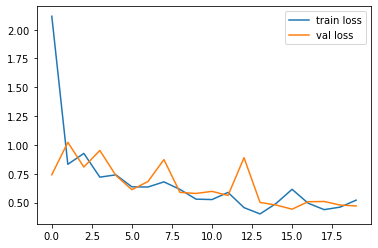

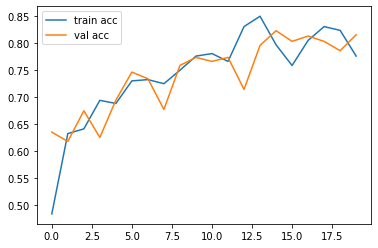

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

D:\ana\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [31]:
y_pred = model.predict(test_set)
y_pred

array([[8.2588263e-02, 5.4418164e-01, 3.7323007e-01],
       [1.6284244e-01, 6.7515564e-01, 1.6200197e-01],
       [2.6447237e-01, 2.9353615e-02, 7.0617396e-01],
       ...,
       [1.1897431e-04, 5.3050015e-03, 9.9457598e-01],
       [9.6451700e-01, 3.5482716e-02, 2.0569833e-07],
       [9.9460110e-02, 9.0053838e-01, 1.4820557e-06]], dtype=float32)

In [32]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2,
       1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 1,
       1, 2, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0,
       1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2,
       0, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 0, 2,

In [33]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('model_resnet50.h5')



In [103]:
img=image.load_img('dataset/test/normal/1308-normal.tif',target_size=(224,224))

In [104]:
x=image.img_to_array(img)
x

array([[[ 33.,  33.,  33.],
        [ 35.,  35.,  35.],
        [ 29.,  29.,  29.],
        ...,
        [ 19.,  19.,  19.],
        [ 14.,  14.,  14.],
        [ 21.,  21.,  21.]],

       [[ 21.,  21.,  21.],
        [ 35.,  35.,  35.],
        [ 34.,  34.,  34.],
        ...,
        [ 33.,  33.,  33.],
        [ 20.,  20.,  20.],
        [ 18.,  18.,  18.]],

       [[ 29.,  29.,  29.],
        [ 30.,  30.,  30.],
        [ 23.,  23.,  23.],
        ...,
        [ 31.,  31.,  31.],
        [ 24.,  24.,  24.],
        [ 12.,  12.,  12.]],

       ...,

       [[  9.,   9.,   9.],
        [  8.,   8.,   8.],
        [ 11.,  11.,  11.],
        ...,
        [  7.,   7.,   7.],
        [  5.,   5.,   5.],
        [  6.,   6.,   6.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [  9.,   9.,   9.],
        [  8.,   8.,   8.],
        [  9.,   9.,   9.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [105]:

x.shape

(224, 224, 3)

In [106]:

x=x/255

In [107]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [108]:
predictions=model.predict(img_data)
predictions

array([[9.4650120e-01, 4.1114737e-07, 5.3498369e-02]], dtype=float32)

In [109]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[0]
